## Data Collection

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('../csv/stocks_with_sentiments.csv')
data.head(10)
data = data.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
data.head(10)

,Unnamed: 0.2,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment,Sentiment.1
0,0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960457,135480400,0.064525,0.064525
1,1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800,-0.426267,-0.426267
2,2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200,-0.040925,-0.040925
3,3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484360,108872000,-0.006867,-0.006867
4,4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650352,132079200,0.221975,0.221975
5,5,2020-01-09,76.809998,77.607498,76.550003,77.407501,75.214752,170108400,0.449733,0.449733
6,6,2020-01-10,77.650002,78.167503,77.062500,77.582497,75.384758,140644800,0.395025,0.395025
7,7,2020-01-13,77.910004,79.267502,77.787498,79.239998,76.995346,121532000,0.539825,0.539825
8,8,2020-01-14,79.175003,79.392502,78.042503,78.169998,75.955635,161954400,-0.278900,-0.278900
9,9,2020-01-15,77.962502,78.875000,77.387497,77.834999,75.630127,121923600,0.079050,0.079050


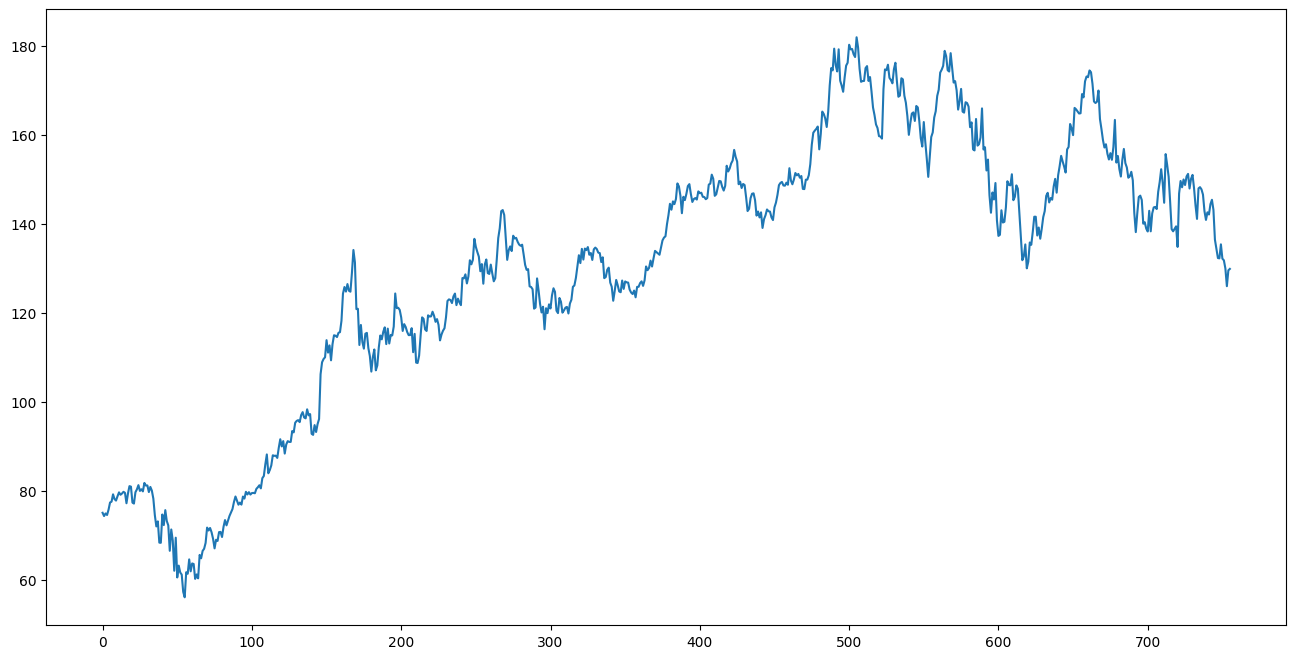

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(data['Close'], label="Closing Price")

## Feature Engineering

In [3]:
# Define features and target
X = data[['Open', 'Close', 'High', 'Low', 'Adj Close', 'Volume', 'Sentiment']]
X.head()


,Open,Close,High,Low,Adj Close,Volume,Sentiment
0,74.059998,75.087502,75.150002,73.797501,72.960457,135480400,0.064525
1,74.287498,74.357498,75.144997,74.125000,72.251144,146322800,-0.426267
2,73.447502,74.949997,74.989998,73.187500,72.826859,118387200,-0.040925
3,74.959999,74.597504,75.224998,74.370003,72.484360,108872000,-0.006867
4,74.290001,75.797501,76.110001,74.290001,73.650352,132079200,0.221975


In [4]:
import numpy as np

# shift function shifts the column up or down
# data['Close'].shift(-1) -> it will get close value of next date 
# The close price of next day is greater than current day, it means it will become expensive

Y = np.where(data['Close'].shift(-1) > data['Close'], 'Buy', 'Sell')
# Y

## Model Building

In [5]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=44)

In [15]:
display(X_train)
display(y_train)

,Open,Close,High,Low,Adj Close,Volume,Sentiment
403,146.199997,146.089996,146.699997,145.520004,143.850250,48908700,0.358400
49,66.222504,69.492500,69.980003,63.237499,67.684212,370732000,0.452100
381,141.580002,143.240005,144.059998,140.669998,140.832947,105575500,0.000000
114,87.864998,88.019997,88.300003,86.180000,85.961662,165428800,-0.219050
430,148.440002,148.789993,148.970001,147.220001,146.508820,68034100,-0.169750
...,...,...,...,...,...,...,...
96,79.169998,79.807503,79.879997,79.129997,77.941223,111504800,-0.274167
571,171.160004,172.139999,173.360001,169.850006,169.964523,77594700,-0.026400
173,117.260002,117.320000,119.139999,115.260002,114.783073,176940500,-0.091067
753,129.669998,126.040001,131.029999,125.870003,125.010139,85438400,0.153100


array(['Sell', 'Sell', 'Buy', 'Sell', 'Sell', 'Buy', 'Buy', 'Buy', 'Buy',
       'Sell', 'Buy', 'Sell', 'Sell', 'Sell', 'Buy', 'Buy', 'Sell', 'Buy',
       'Buy', 'Sell', 'Buy', 'Sell', 'Sell', 'Sell', 'Sell', 'Sell',
       'Sell', 'Buy', 'Sell', 'Buy', 'Buy', 'Buy', 'Sell', 'Buy', 'Sell',
       'Buy', 'Sell', 'Buy', 'Sell', 'Sell', 'Sell', 'Buy', 'Sell', 'Buy',
       'Sell', 'Sell', 'Buy', 'Sell', 'Buy', 'Buy', 'Buy', 'Buy', 'Sell',
       'Sell', 'Buy', 'Sell', 'Sell', 'Buy', 'Buy', 'Buy', 'Sell', 'Buy',
       'Buy', 'Buy', 'Sell', 'Sell', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy',
       'Buy', 'Sell', 'Sell', 'Sell', 'Sell', 'Buy', 'Sell', 'Sell',
       'Buy', 'Buy', 'Buy', 'Buy', 'Sell', 'Sell', 'Sell', 'Sell', 'Buy',
       'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Sell', 'Buy', 'Sell',
       'Buy', 'Buy', 'Buy', 'Sell', 'Sell', 'Buy', 'Buy', 'Buy', 'Buy',
       'Buy', 'Buy', 'Buy', 'Buy', 'Sell', 'Sell', 'Buy', 'Sell', 'Buy',
       'Buy', 'Buy', 'Buy', 'Buy', 'Sell', 'Buy', 'Bu

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Using Grid search to find the best paramenter K 
# K value is a hyperparameter - # of neighbors
# # of neighbors can vary from 2 - 15
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5)

# fit the model 
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [7]:
# Make predictions on test data
y_pred = model.predict(X_test)

## Model Evaluation

In [8]:
# Accuracy score

# accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, y_pred)

# print("Train data accuracy: %.2f" %accuracy_train)
print("Test data accuracy: %.2f" %accuracy_test)

Test data accuracy: 0.54


In [9]:
from sklearn import metrics

# Evaluate the model
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Buy       0.56      0.55      0.55        97
        Sell       0.53      0.54      0.54        92

    accuracy                           0.54       189
   macro avg       0.54      0.54      0.54       189
weighted avg       0.55      0.54      0.55       189



[[53 44]
 [42 50]]


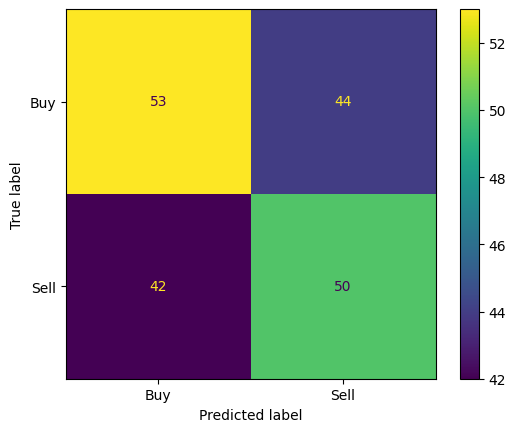

In [10]:
# Confusion matrix

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Buy', 'Sell'])
cm_display.plot()
plt.show()


In [11]:
actual_predict = pd.DataFrame({"Actual Class": y_test, "Predicted Class": y_pred})
actual_predict.head(10)
actual_predict.tail(10)

,Actual Class,Predicted Class
179,Buy,Buy
180,Sell,Sell
181,Buy,Buy
182,Sell,Buy
183,Sell,Buy
184,Sell,Sell
185,Buy,Buy
186,Sell,Buy
187,Buy,Sell
188,Sell,Buy


## Model Deployment

In [12]:
import joblib

# Save the model
joblib.dump(model, '../pkl/stock_buy_sell_knn_classifier.pkl')

# Load the model
model = joblib.load('../pkl/stock_buy_sell_knn_classifier.pkl')


In [13]:
import pandas as pd

# Feature names used during model training
feature_names = ['Open', 'Close', 'High', 'Low', 'Adj Close', 'Volume', 'Sentiment']

# New data for prediction
open, close, high, low, adj_close, volume, avg_sentiment = 113.910004, 116.500000, 116.650002, 113.550003, 113.980804, 106243800, -0.374800
new_data = pd.DataFrame([[open, close, high, low, adj_close, volume, avg_sentiment]], columns=feature_names)

print(new_data)

# Predict for a new day
predicted_close = model.predict(new_data)
print(f'Predicted Close Price: {predicted_close[0]}')

         Open  Close        High         Low   Adj Close     Volume  Sentiment
0  113.910004  116.5  116.650002  113.550003  113.980804  106243800    -0.3748
Predicted Close Price: Buy
